# **Step 1: Data Cleaning and Preparation**


DataFrame with additional metrics:
                Team  matches_played  wins  win_rate  goals_per_match  \
0        Real Madrid             486   291  0.598765              NaN   
1      Bayern Munich             388   231  0.595361              NaN   
2       FC Barcelona             341   196  0.574780              NaN   
3  Manchester United             289   153  0.529412              NaN   
4           Juventus             297   151  0.508418              NaN   

   points_per_match  
0          1.096708  
1          1.100515  
2          0.935484  
3          0.775087  
4          0.575758  

Win-to-Loss Ratio:
                               Team  win_loss_ratio
206                  Zbrojovka Brno             inf
140                       FC Ararat            5.00
147                         AFC DWS            4.00
98                       1. FC Köln            3.50
74                   Spartak Trnava            3.25
..                              ...             ...
318      

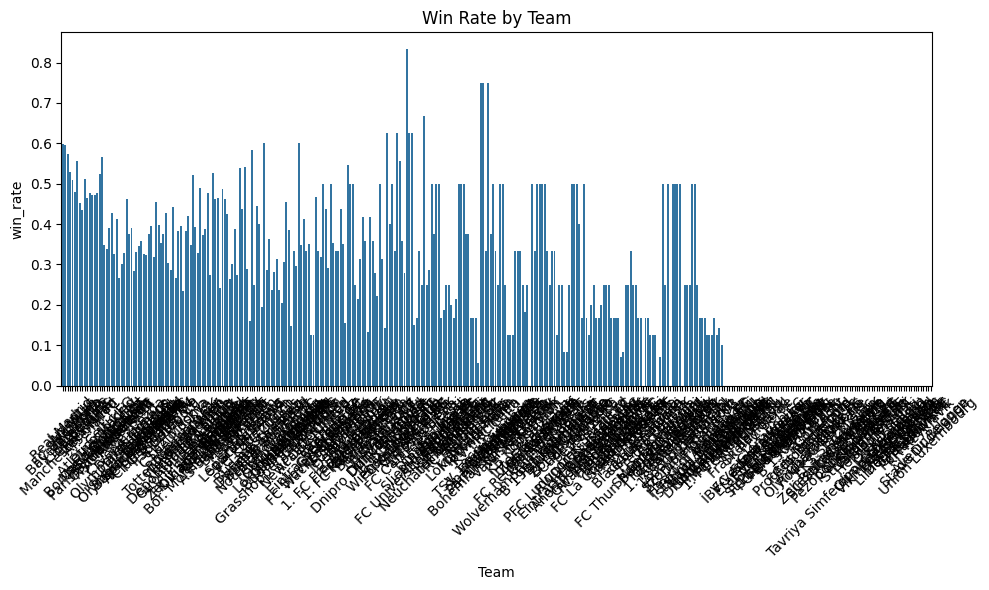

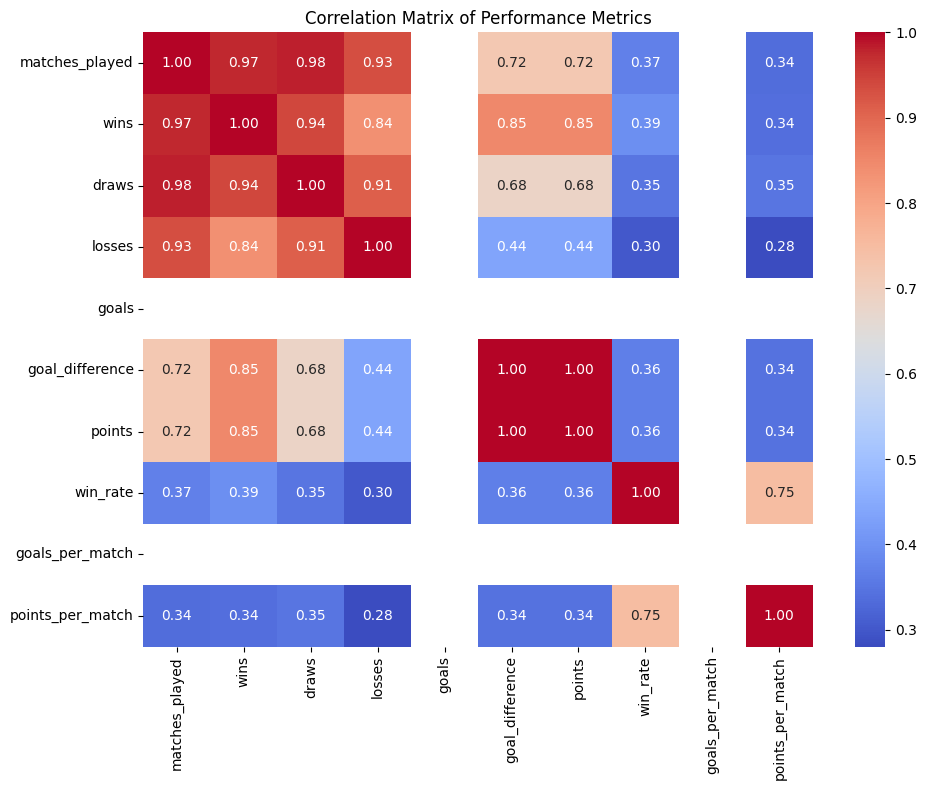

<Figure size 1200x2000 with 0 Axes>

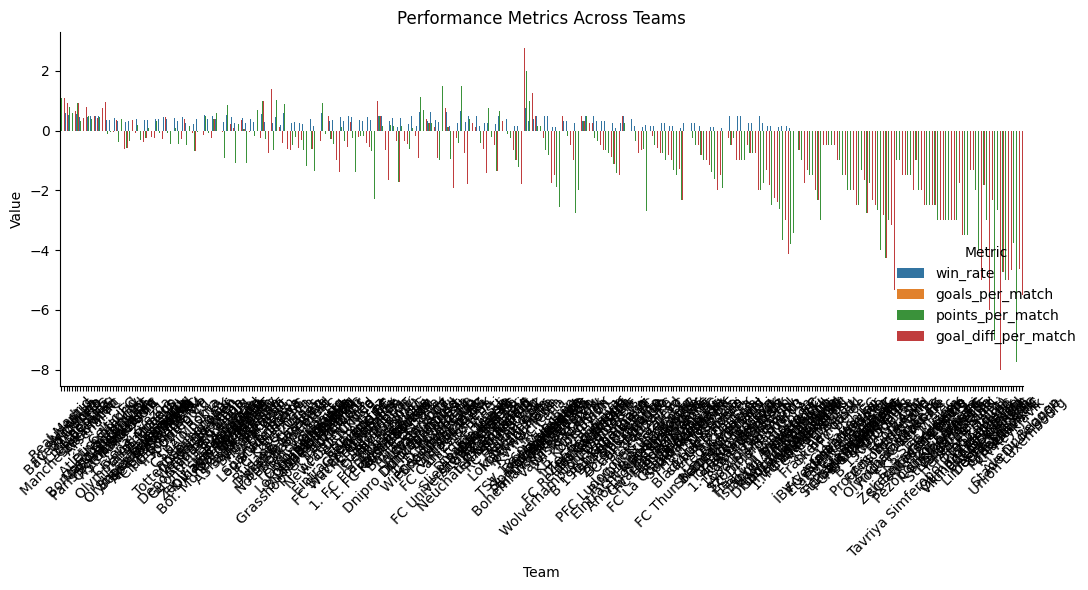

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Recreating the dataset from the information provided

df = pd.read_csv('https://raw.githubusercontent.com/JadenDsouza/UEFA_Champions_League_Data_Analysis_/refs/heads/main/UCL_AllTime_Performance_Table.csv')
# Make sure all numerical columns are properly typed as numbers
numeric_columns = ['#', 'matches_played', 'wins', 'draws', 'losses', 'goals', 'goal_difference', 'points']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any remaining string values that should be numbers
for col in numeric_columns:
    if df[col].dtype == 'object':
        print(f"Column {col} contains non-numeric values")
        # You can inspect the problematic values
        print(df[df[col].apply(lambda x: not isinstance(x, (int, float)))][col])

# Now calculate additional metrics
df['win_rate'] = df['wins'] / df['matches_played']
df['goals_per_match'] = df['goals'] / df['matches_played']
df['points_per_match'] = df['points'] / df['matches_played']
df['goal_diff_per_match'] = df['goal_difference'] / df['matches_played']

print("\nDataFrame with additional metrics:")
print(df[['Team', 'matches_played', 'wins', 'win_rate', 'goals_per_match', 'points_per_match']].head())

# Visualize the team performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='win_rate', data=df)
plt.title('Win Rate by Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('win_rate_chart.png')

# Let's do a quick correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = df[['matches_played', 'wins', 'draws', 'losses',
                  'goals', 'goal_difference', 'points',
                  'win_rate', 'goals_per_match', 'points_per_match']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Performance comparison across multiple metrics
plt.figure(figsize=(12, 20))
metrics = ['win_rate', 'goals_per_match', 'points_per_match', 'goal_diff_per_match']
df_melted = pd.melt(df, id_vars=['Team'], value_vars=metrics,
                    var_name='Metric', value_name='Value')

sns.catplot(data=df_melted, x='Team', y='Value', hue='Metric', kind='bar', height=6, aspect=1.5)
plt.title('Performance Metrics Across Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_comparison.png')

# Calculate win-to-loss ratio
df['win_loss_ratio'] = df['wins'] / df['losses']
print("\nWin-to-Loss Ratio:")
print(df[['Team', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False))

# Display team rankings based on points per match
print("\nTeam Rankings based on Points per Match:")
print(df[['Team', 'points_per_match']].sort_values(by='points_per_match', ascending=False))

# **Step 2: Exploratory Data Analysis**


Correlation Matrix:
                 matches_played      wins     draws    losses  goals  \
matches_played         1.000000  0.974861  0.981159  0.933849    NaN   
wins                   0.974861  1.000000  0.943131  0.836572    NaN   
draws                  0.981159  0.943131  1.000000  0.911338    NaN   
losses                 0.933849  0.836572  0.911338  1.000000    NaN   
goals                       NaN       NaN       NaN       NaN    NaN   
goal_difference        0.719490  0.850304  0.683847  0.437281    NaN   
points                 0.719490  0.850304  0.683847  0.437281    NaN   
win_rate               0.369980  0.393172  0.349130  0.300980    NaN   
goals_per_match             NaN       NaN       NaN       NaN    NaN   

                 goal_difference    points  win_rate  goals_per_match  
matches_played          0.719490  0.719490  0.369980              NaN  
wins                    0.850304  0.850304  0.393172              NaN  
draws                   0.683847  0.683847

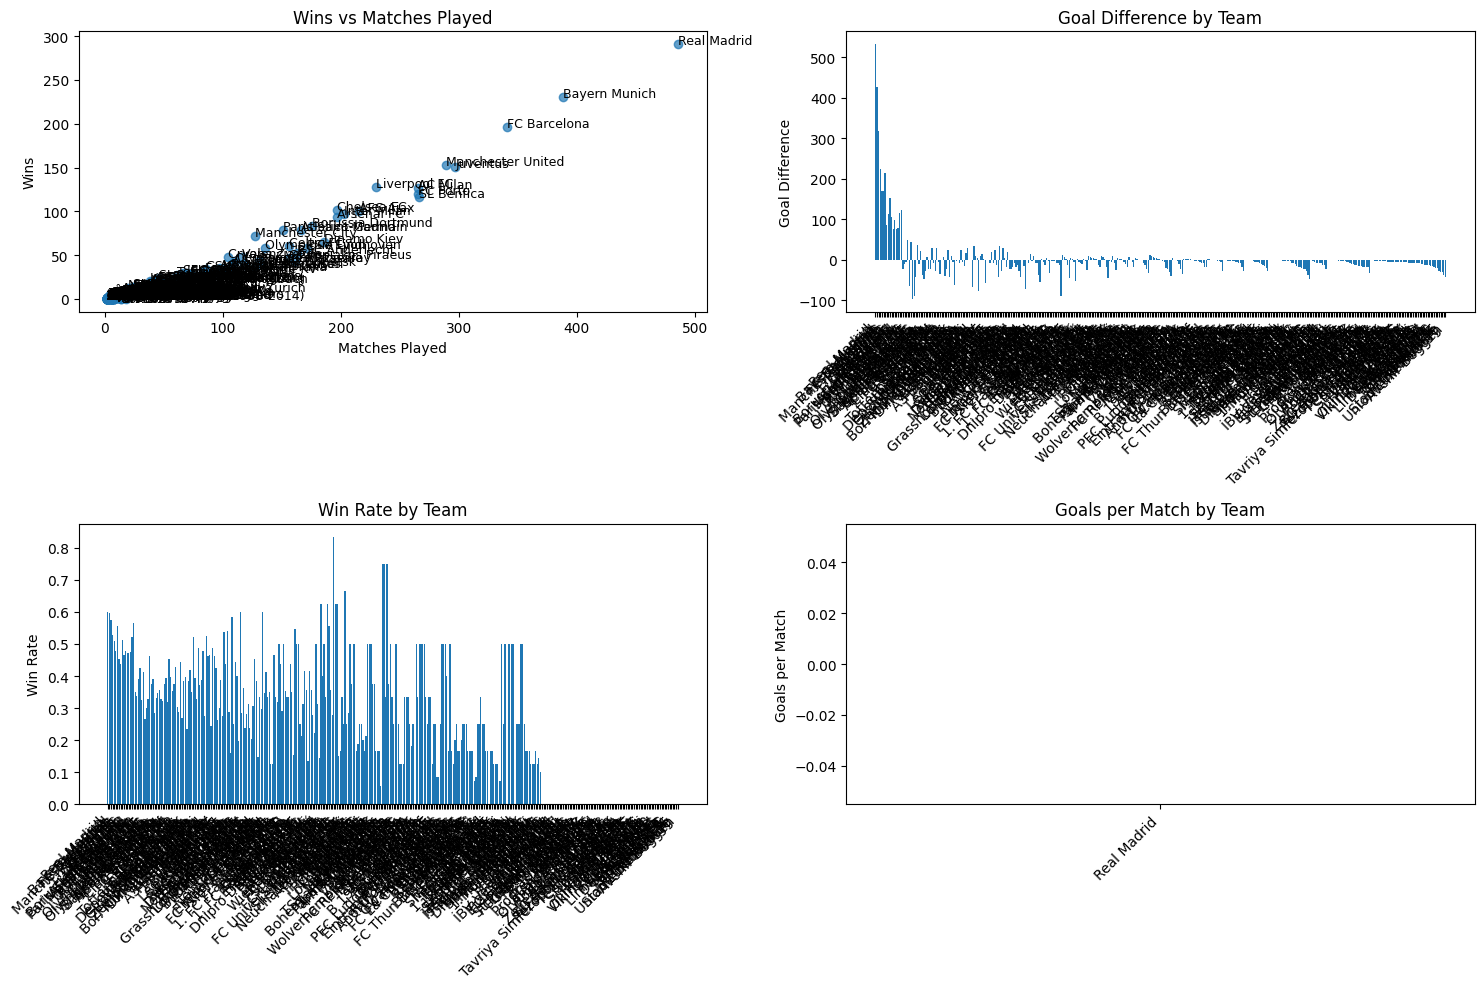

In [4]:
# Analyzing relationships between variables
plt.figure(figsize=(15, 10))

# Plot 1: Wins vs Matches Played
plt.subplot(2, 2, 1)
plt.scatter(df['matches_played'], df['wins'], alpha=0.7)
for i, txt in enumerate(df['Team']):
    plt.annotate(txt, (df['matches_played'][i], df['wins'][i]), fontsize=9)
plt.xlabel('Matches Played')
plt.ylabel('Wins')
plt.title('Wins vs Matches Played')

# Plot 2: Goal Difference Distribution
plt.subplot(2, 2, 2)
plt.bar(df['Team'], df['goal_difference'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goal Difference')
plt.title('Goal Difference by Team')

# Plot 3: Win Rate Analysis
plt.subplot(2, 2, 3)
plt.bar(df['Team'], df['win_rate'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Win Rate')
plt.title('Win Rate by Team')

# Plot 4: Goals per Match
plt.subplot(2, 2, 4)
plt.bar(df['Team'], df['goals_per_match'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goals per Match')
plt.title('Goals per Match by Team')

plt.tight_layout()
plt.savefig('team_performance_analysis.png')

# Correlation analysis
correlation = df[['matches_played', 'wins', 'draws', 'losses', 'goals', 'goal_difference', 'points', 'win_rate', 'goals_per_match']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# **Step 3: Performance Metrics Analysis**

<ipython-input-6-26164808fbba>:56: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


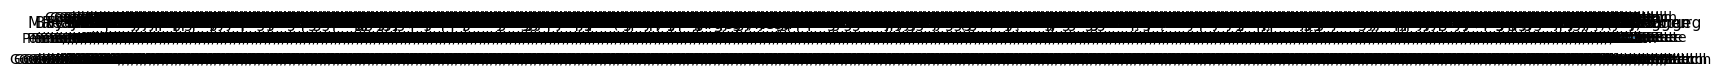


Efficiency Metrics:
                 Team  win_rate  goals_per_match  points_per_match  \
170      Ipswich Town  0.750000              NaN             2.750   
171  TSV 1860 München  0.750000              NaN             2.000   
140         FC Ararat  0.833333              NaN             1.500   
147           AFC DWS  0.666667              NaN             1.500   
77        Stade Reims  0.583333              NaN             1.375   
..                ...       ...              ...               ...   
353     Avenir Beggen  0.000000              NaN            -5.500   
341      AEL Limassol  0.000000              NaN            -6.000   
343       KPV Kokkola  0.000000              NaN            -7.000   
351   Stade Dudelange  0.000000              NaN            -7.750   
345       EPA Larnaca  0.000000              NaN            -8.000   

     goal_diff_per_match  
170                2.750  
171                2.000  
140                1.500  
147                1.500  
77 

In [6]:
df['goal_diff_per_match'] = df['goal_difference'] / df['matches_played']

# Define metrics for radar chart
metrics = ['Win Rate', 'Goals/Match', 'Points/Match', 'Goal Difference/Match']

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Function to create radar chart
def create_radar_chart(ax, angles, stats, team_name):
    # Plot data
    ax.plot(angles, stats, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, stats, alpha=0.1)
    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])  # Don't show the last angle (which is just a duplicate)
    ax.set_xticklabels(metrics)
    ax.set_title(team_name, size=11, y=1.1)
    return ax

# Create a figure for the radar charts
fig, axs = plt.subplots(1, len(df), figsize=(20, 4), subplot_kw=dict(polar=True))

# Handle the case when there's only one team (axs would not be an array)
if len(df) == 1:
    axs = [axs]

# Find max values for normalization
max_stats = [
    df['win_rate'].max(),
    df['goals_per_match'].max(),
    df['points_per_match'].max(),
    df['goal_diff_per_match'].max()
]

# Plot each team's radar chart
for i, (idx, row) in enumerate(df.iterrows()):
    team_stats = [
        row['win_rate'],
        row['goals_per_match'],
        row['points_per_match'],
        row['goal_diff_per_match']
    ]

    # Normalize stats (0-1 scale)
    team_stats = [s/m for s, m in zip(team_stats, max_stats)]

    # Add first stat again to close the loop
    stats = team_stats + [team_stats[0]]

    # Create the radar chart
    create_radar_chart(axs[i], angles, stats, row['Team'])

plt.tight_layout()

# Save figure
plt.savefig('team_radar_charts.png')

# Display the plot (if in interactive environment)
plt.show()

# Calculate efficiency metrics
print("\nEfficiency Metrics:")
efficiency_df = df[['Team', 'win_rate', 'goals_per_match', 'points_per_match', 'goal_diff_per_match']]
print(efficiency_df.sort_values(by='points_per_match', ascending=False))

# **Step 4: Statistical Tests and Deeper Analysis**

In [7]:
from scipy import stats

# Let's analyze the relationship between matches played and success metrics
print("\nRegression Analysis: Impact of Experience (Matches Played) on Performance")

# Matches played vs. Win Rate
slope, intercept, r_value, p_value, std_err = stats.linregress(df['matches_played'], df['win_rate'])
print(f"Matches played vs. Win Rate: r² = {r_value**2:.3f}, p-value = {p_value:.3f}")

# Matches played vs. Goals per Match
slope, intercept, r_value, p_value, std_err = stats.linregress(df['matches_played'], df['goals_per_match'])
print(f"Matches played vs. Goals per Match: r² = {r_value**2:.3f}, p-value = {p_value:.3f}")

# Comparisons between teams
print("\nTeam Performance Comparison:")
team_metrics = df[['Team', 'win_rate', 'goals_per_match', 'points_per_match']]
print(team_metrics)

# Efficiency calculation (points per match / goals required)
df['efficiency'] = df['points_per_match'] / df['goals_per_match']
print("\nTeam Efficiency (Points per Goal):")
efficiency_ranking = df[['Team', 'efficiency']].sort_values(by='efficiency', ascending=False)
print(efficiency_ranking)

# Performance consistency (if we had more data, we could calculate standard deviation of performance across seasons)
print("\nPerformance Summary Statistics:")
summary_stats = df[['win_rate', 'goals_per_match', 'points_per_match']].describe()
print(summary_stats)

# Wins to Losses ratio
df['win_loss_ratio'] = df['wins'] / df['losses']
print("\nWin-to-Loss Ratio:")
win_loss_ratio = df[['Team', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False)
print(win_loss_ratio)


Regression Analysis: Impact of Experience (Matches Played) on Performance
Matches played vs. Win Rate: r² = 0.137, p-value = 0.000
Matches played vs. Goals per Match: r² = nan, p-value = nan

Team Performance Comparison:
                  Team  win_rate  goals_per_match  points_per_match
0          Real Madrid  0.598765              NaN          1.096708
1        Bayern Munich  0.595361              NaN          1.100515
2         FC Barcelona  0.574780              NaN          0.935484
3    Manchester United  0.529412              NaN          0.775087
4             Juventus  0.508418              NaN          0.575758
..                 ...       ...              ...               ...
349       KR Reykjavík  0.000000              NaN         -4.666667
350        Keflavík ÍF  0.000000              NaN         -3.750000
351    Stade Dudelange  0.000000              NaN         -7.750000
352   Union Luxembourg  0.000000              NaN         -4.625000
353      Avenir Beggen  0.0000